# Scaling pyekfmm reults
Default units for pyekfmm are:
- Distance: km
- Time: s
- Velocity: km/s

This script generalizes results generation and plotting for any scale.

##  Libraries

In [ ]:
# !pip install pyekfmm     # when run in google.colab, you may have to unlock this line and reinstall the pyekfmm repository, if using Windows, you need software with both python and c capabilities to properly intall it and run it.

import pyekfmm as fmm
import numpy as np
import matplotlib.pyplot as plt

## 2D Model

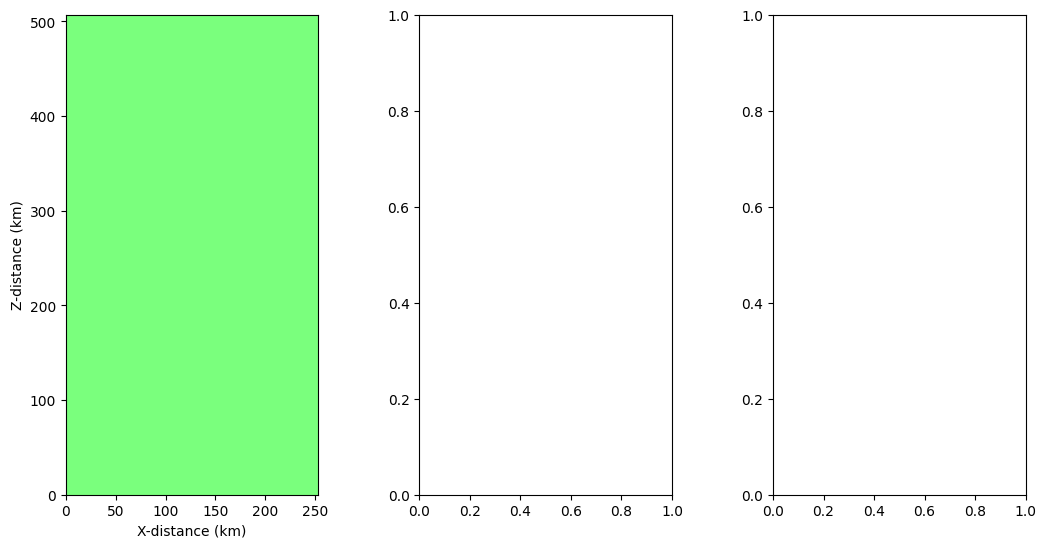

In [50]:
# Define scale
scale=1e-0                        # 1 is km, 1e-3 is m, 1e-6 is mm (and so on...)

# Defining space
# 2D models are 3D modela with 1 grid length in a specific direction. Consequently, we need to define parameters for x, y, and z.
# pyekfmm is for a VTI model whose axis is along the Z-axis direction. For convenience, we analyze the model in the XZ plane.
# TTI analysis requires axis rotation before running this repository.

# Grid size.
# This parameter has to be the same in x, y and z, direction.
d_size = 1*scale

# Dimensions
nx = 254
ny = 1
nz = 508

# Velocities
# Step 1. Build a velocity model (this case is a simple homogeneous case, migrating from Thomsen's parameters to vz, vx, and eta parameters)
vz = 5
epsilon = 0
delta = 0

vx = vz*(1+2*epsilon)
eta = (epsilon-delta)/(1+2*delta)

vz_3d = vz*np.ones([nz,nx,ny],dtype='float32')               # The vertical 'z' axis is the first axis, then horizontal axis 'x' and 'y' are defined.
vz_2d = vz*np.ones([nz,nx],dtype='float32')               # The vertical 'z' axis is defined first.

vx_3d = vx*np.ones([nz,nx,ny],dtype='float32')               # The vertical 'z' axis is the first axis, then horizontal axis 'x' and 'y' are defined.
vx_2d = vx*np.ones([nz,nx],dtype='float32')               # The vertical 'z' axis is defined first.

eta_3d = vz*np.ones([nz,nx,ny],dtype='float32')               # The vertical 'z' axis is the first axis, then horizontal axis 'x' and 'y' are defined.
eta_2d = vz*np.ones([nz,nx],dtype='float32')               # The vertical 'z' axis is defined first.

# Step 1. Build a velocity model (this case is a simple homogeneous case)
# Ploting the velocity model
# Defining x and z axis:
x_axis = np.arange(nx)*d_size
z_axis = np.arange(nz)*d_size
x_2d, z_2d = np.meshgrid(x_axis,z_axis)

fig, axs = plt.subplots(1,3)
axs[0].contourf(x_2d, z_2d, vz_2d)
axs[0].set_xlabel('X-distance (km)'); axs[0].set_ylabel('Z-distance (km)')
axs[0].contourf(x_2d, z_2d, vx_2d)
axs[0].set_xlabel('X-distance (km)'); axs[0].set_ylabel('Z-distance (km)')
axs[0].contourf(x_2d, z_2d, eta_2d)
axs[0].set_xlabel('X-distance (km)'); axs[0].set_ylabel('Z-distance (km)')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1, wspace=0.4, hspace=0.1)

In [5]:
# !pip install pyekfmm

import pyekfmm as fmm
import numpy as np
import matplotlib.pyplot as plt

# 3D Grid. This model has a single velocity.
# Velocity (um/s)
v1=6;
scale=1e-0
# Dimensions
# X axis: 1 in, Y axis: 2 in, Z axis: 1 in
# Element size
dx=1*scale; dz=1*scale; dy=1*scale;
# Object size:
nx=254
ny=2*254
nz=254
print('Nx:'+str(nx), 'Sizex:'+str(nx*dx)+' km')
print('Ny:'+str(ny), 'Sizey:'+str(ny*dy)+' km')
print('Nz:'+str(nz), 'Sizez:'+str(nz*dz)+' km')
## Source location [x,y,z]
sx=0*scale; sy=254*0.4*scale; sz=254*scale;

## create or load velocity model [z,x,y]
vel3d=v1*np.ones([nz,nx,ny],dtype='float32');

Nx:254 Sizex:254.0 km
Ny:508 Sizey:508.0 km
Nz:254 Sizez:254.0 km


In [6]:
## velocity dimension swap [z,x,y] -> [x,y,z]
vxyz=np.swapaxes(np.swapaxes(vel3d,0,1),1,2);

In [7]:
## FMM calculation
t=fmm.eikonal(vxyz.flatten(order='F'),xyz=np.array([sx,sy,sz]),ax=[0,dx,nx],ay=[0,dy,ny],az=[0,dz,nz],order=2);
time=t.reshape(nx,ny,nz,order='F');#first axis (vertical) is x, second is y, third is z
tzxy=np.swapaxes(np.swapaxes(time,1,2),0,1);

/usr/local/lib/python3.10/dist-packages/pyekfmm/plot.py:72: UserWarning: The following kwargs were not used by contour: 'barlabel', 'format', 'dpi'
  _ = ax.contourf(
/usr/local/lib/python3.10/dist-packages/pyekfmm/plot.py:77: UserWarning: The following kwargs were not used by contour: 'barlabel', 'format', 'dpi'
  _ = ax.contourf(
/usr/local/lib/python3.10/dist-packages/pyekfmm/plot.py:81: UserWarning: The following kwargs were not used by contour: 'barlabel', 'format', 'dpi'
  C = ax.contourf(


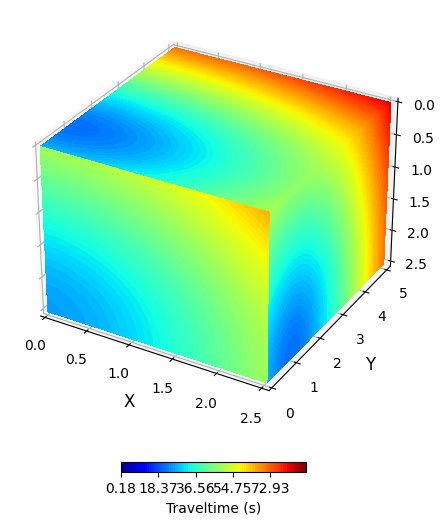

In [8]:

## plot 3D velocity model
from pyekfmm import plot3d

## Below is a quick plot and save the figure
plot3d(tzxy,cmap=plt.cm.jet,barlabel='Traveltime (s)',figname='vel3d.png',format='png',dpi=300)

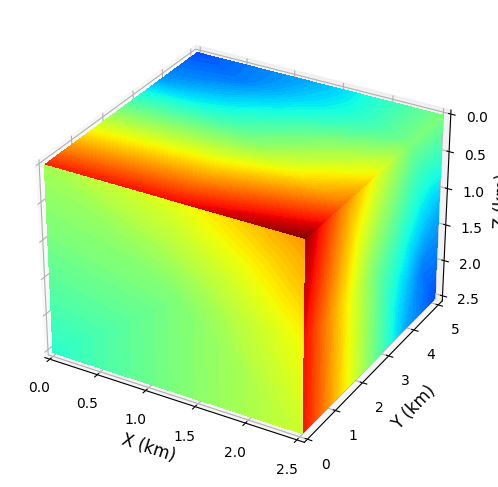

In [ ]:
# You can also customize the plotting fuctions
# showf=False means not show the figure immeidate
# close=False means you will continue customizing the figure

plot3d(tzxy,cmap=plt.cm.jet,showf=False,close=False);
plt.gca().set_xlabel("X (km)",fontsize='large', fontweight='normal')
plt.gca().set_ylabel("Y (km)",fontsize='large', fontweight='normal')
plt.gca().set_zlabel("Z (km)",fontsize='large', fontweight='normal')
plt.show()

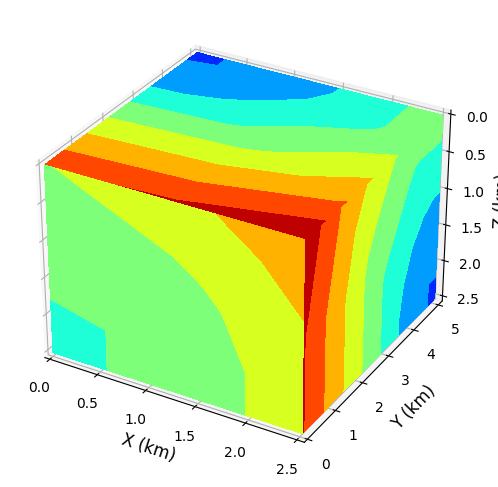

In [ ]:
# You can further specify the color levels (default is nlevel=100)

plot3d(tzxy,nlevel=10,cmap=plt.cm.jet,showf=False,close=False);
plt.gca().set_xlabel("X (km)",fontsize='large', fontweight='normal')
plt.gca().set_ylabel("Y (km)",fontsize='large', fontweight='normal')
plt.gca().set_zlabel("Z (km)",fontsize='large', fontweight='normal')
plt.show()

ValueError: Contour levels must be increasing

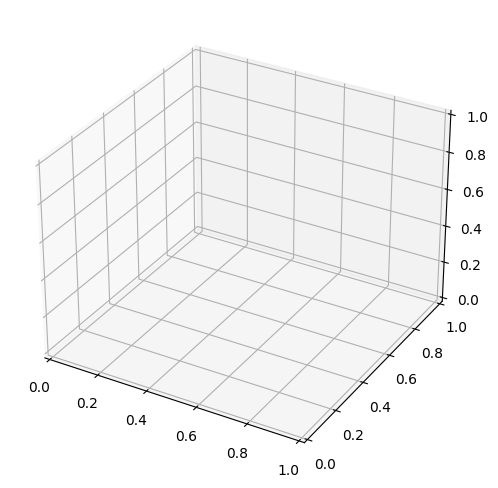

In [ ]:
## Also plot the velocity model

# plot3d(vel3d,cmap=plt.cm.jet,barlabel='Velocity (km/s)',figname='vel3d.png',format='png',dpi=300)#,figname='time3d.png',format='png',dpi=300)
plot3d(vel3d,cmap=plt.cm.jet,barlabel='Velocity (m/s)',showf=False,close=False);
plt.gca().set_xlabel("X (km)",fontsize='large', fontweight='normal')
plt.gca().set_ylabel("Y (km)",fontsize='large', fontweight='normal')
plt.gca().set_zlabel("Z (km)",fontsize='large', fontweight='normal')
plt.show()

First break
Before trim (3, 2541)
After trim (3, 2538)
First break
Before trim (3, 2541)
After trim (3, 2538)
First break
Before trim (3, 2541)
After trim (3, 2538)
First break
Before trim (3, 2541)
After trim (3, 2538)
2538


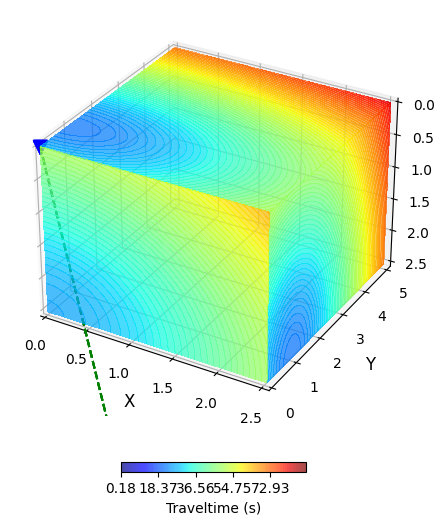

In [10]:
# Ray tracing and plotting
from pyekfmm import ray3d
plot3d(tzxy,cmap=plt.cm.jet,barlabel='Traveltime (s)',showf=False,close=False,alpha=0.7);
ry=np.array([254*0.4*scale,254*0.8*scale,254*1.2*scale,254*1.6*scale]);
rx=254*scale;rz=254/2*scale;
# ry=np.array([0,0,0,0]);
# rx=0;rz=0;
for y in ry:
	paths=ray3d(time,source=[sx,sy,sz],receiver=[rx,y,rz],trim=0.5,ax=[0,dx,nx],ay=[0,dy,ny],az=[0,dz,nz])
	plt.plot(rx,y,rz,'vb',markersize=10);
	## plot rays
	plt.plot(paths[0,:],paths[1,:],paths[2,:],'g--',markersize=20);

print(len(paths[0,:]));

plt.savefig('raytracing3d.png',format='png',dpi=300)
# Show Figure
plt.show()

201
10


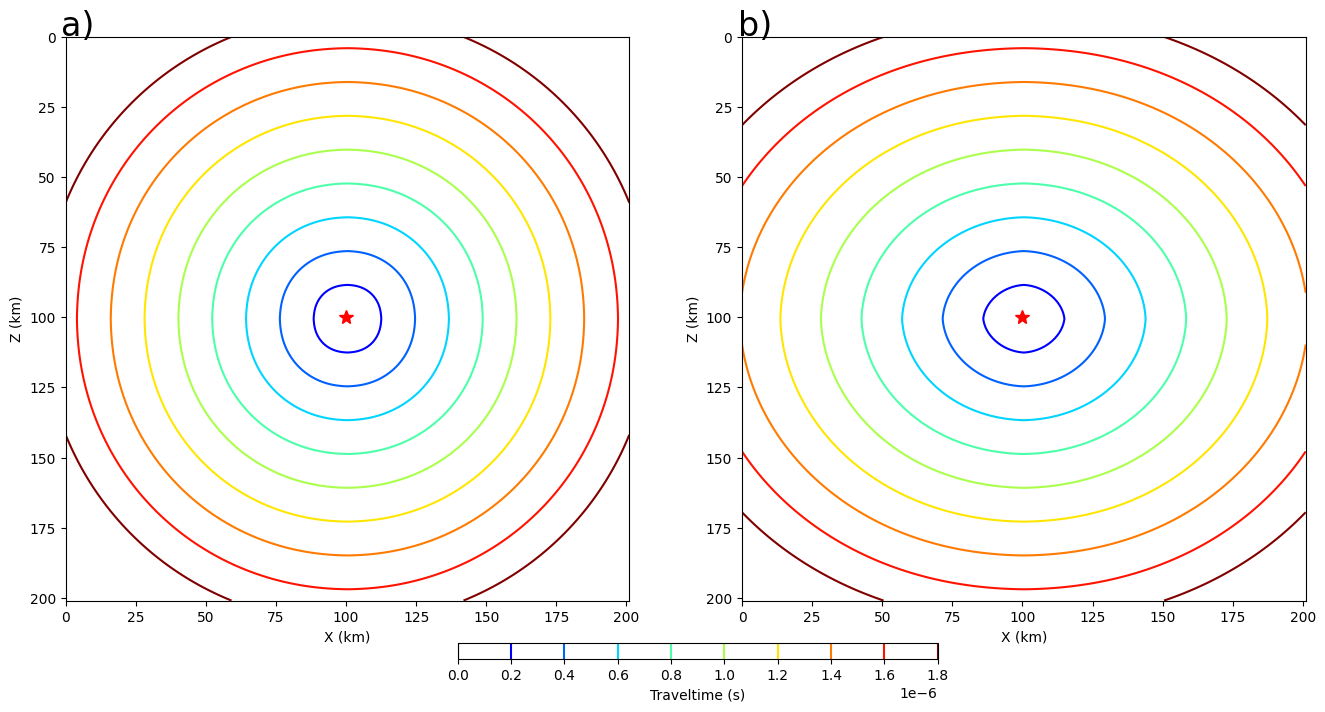

['Testing result:', 2.1616802e-06, 0.0, 4.4148834e-07, 1.9491196e-13]
['Correct result:', 2.1797864, 0.0, 0.44571817, 0.19866468]


In [ ]:
## This DEMO is a 2D example [x,z] with constant velocity in VTI media and with one shot
#
#  COPYRIGHT: Yangkang Chen, 2022, The University of Texas at Austin

import pyekfmm as fmm
import numpy as np

# Model
# velx>=velz
vz=3
eps=0.1
delta=0
vx=vz*(1+2*eps)

# Dimensions
scale=1e-6
dx=0.05*scale; dy=0.05*scale; dz=0.05*scale
sizex=10.05*scale; sizey=0.05*scale; sizez=10.05*scale

#
velz=vz*np.ones([int(sizex/dx)*int(sizez/dz),1],dtype='float32'); #velocity axis must be x,y,z respectively
velx=vx*np.ones([int(sizex/dx)*int(sizez/dz),1],dtype='float32'); #velocity axis must be x,y,z respectively
eta=0*np.ones([int(sizex/dx)*int(sizez/dz),1],dtype='float32'); #velocity axis must be x,y,z respectively
print(int(sizex/dx))
# Source
sx=5*scale; sy=0*scale; sz=5*scale

# Inversion
t=fmm.eikonalvti(velx,velz,eta,xyz=np.array([sx,sy,sz]),ax=[0,dx,int(sizex/dx)],ay=[0,dy,int(sizey/dy)],az=[0,dz,int(sizez/dz)],order=1);
time=t.reshape(int(sizex/dx),int(sizez/dz),order='F');#first axis (vertical) is x, second is z

# Isotropic case
t=fmm.eikonal(velz,xyz=np.array([sx,sy,sz]),ax=[0,dx,int(sizex/dx)],ay=[0,dy,int(sizey/dy)],az=[0,dz,int(sizez/dz)],order=2);
time0=t.reshape(int(sizex/dx),int(sizez/dz),order='F');#first axis (vertical) is x, second is z
print(np.size(np.arange(10)*0.2*scale))

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121,aspect=1.0)
# plt.imshow(time.transpose(),cmap=plt.cm.jet, interpolation='none', extent=[0,10,10,0]); #transpose so that first axis is z, second is x
plt.contour(time0.transpose(),np.arange(10)*0.2*scale,extent=[0,int(sizex/dx),0,int(sizez/dz)])
plt.plot(sx/dx,sz/dz,'*r',markersize=10)
plt.xlabel('X (km)');plt.ylabel('Z (km)');
plt.jet()
plt.gca().invert_yaxis()
plt.text(-1.5, -0.5, 'a)', fontsize=24)

ax = fig.add_subplot(122,aspect=1.0)
plt.contour(time.transpose(),np.arange(10)*0.2*scale,extent=[0,int(sizex/dx),0,int(sizex/dx)])
plt.plot(sx/dx,sz/dz,'*r',markersize=10)
plt.xlabel('X (km)');plt.ylabel('Z (km)');
plt.jet()
plt.gca().invert_yaxis()
plt.text(-1.5, -0.5, 'b)', fontsize=24)

plt.colorbar(orientation='horizontal',cax=fig.add_axes([0.37,0.07,0.3,0.02]),shrink=1,label='Traveltime (s)');


# plt.savefig('test_pyekfmm_fig1.png',format='png',dpi=300,bbox_inches='tight', pad_inches=0)
# plt.savefig('test_pyekfmm_fig1.pdf',format='pdf',dpi=300,bbox_inches='tight', pad_inches=0)
plt.show()

## Verify
print(['Testing result:',time.max(),time.min(),time.std(),time.var()])
print(['Correct result:',2.1797864, 0.0, 0.44571817, 0.19866468])

In [14]:
paths=fmm.ray3d(time,source=[sx,sy,sz],receiver=[rx,y,rz],trim=0.5,ax=[0,dx,nx],ay=[0,dy,ny],az=[0,dz,nz])
# plt.plot(paths)

First break
Before trim (3, 2541)
After trim (3, 2538)


(3, 2538)
0
0
0
0.0
101.60000000000001
0.0


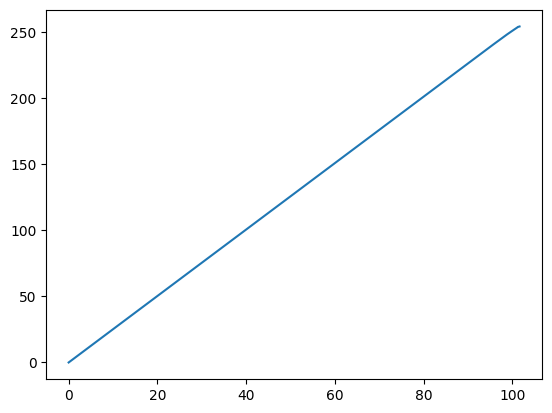

In [25]:
print(np.shape(paths))
plt.plot(paths[1,:],paths[2,:])
print(rx)
print(y)
print(rz)
print(sx)
print(sy)
print(sx)